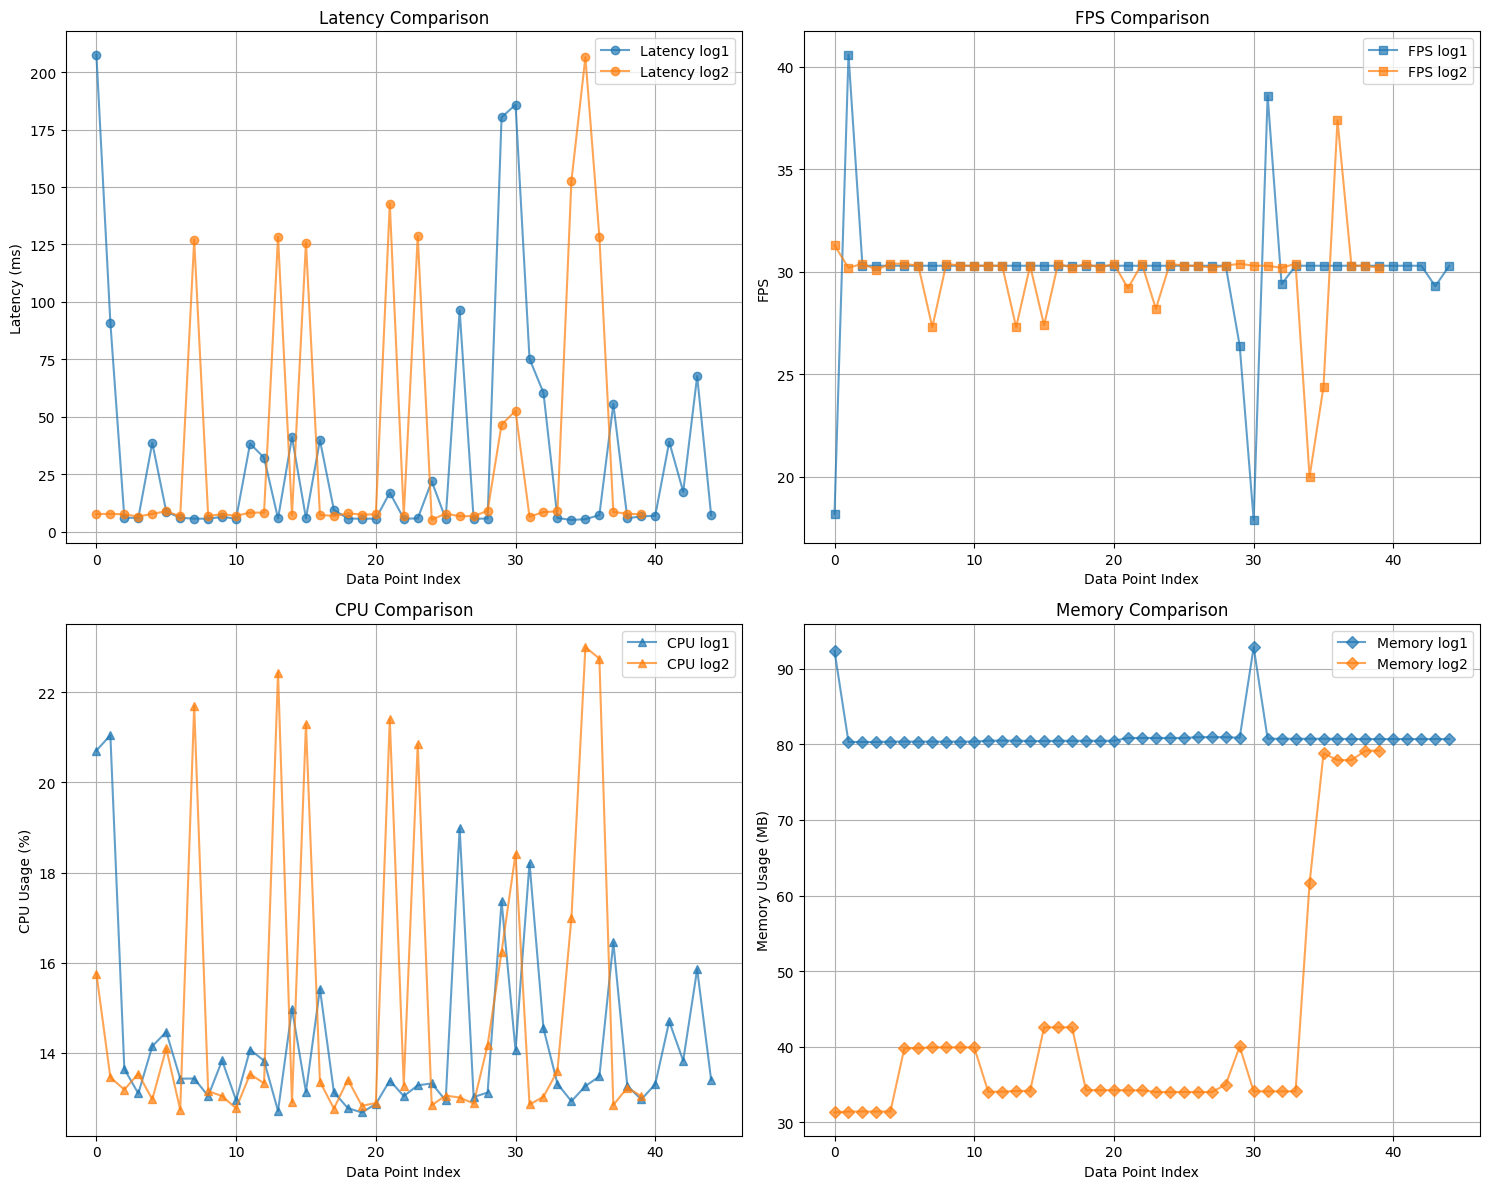

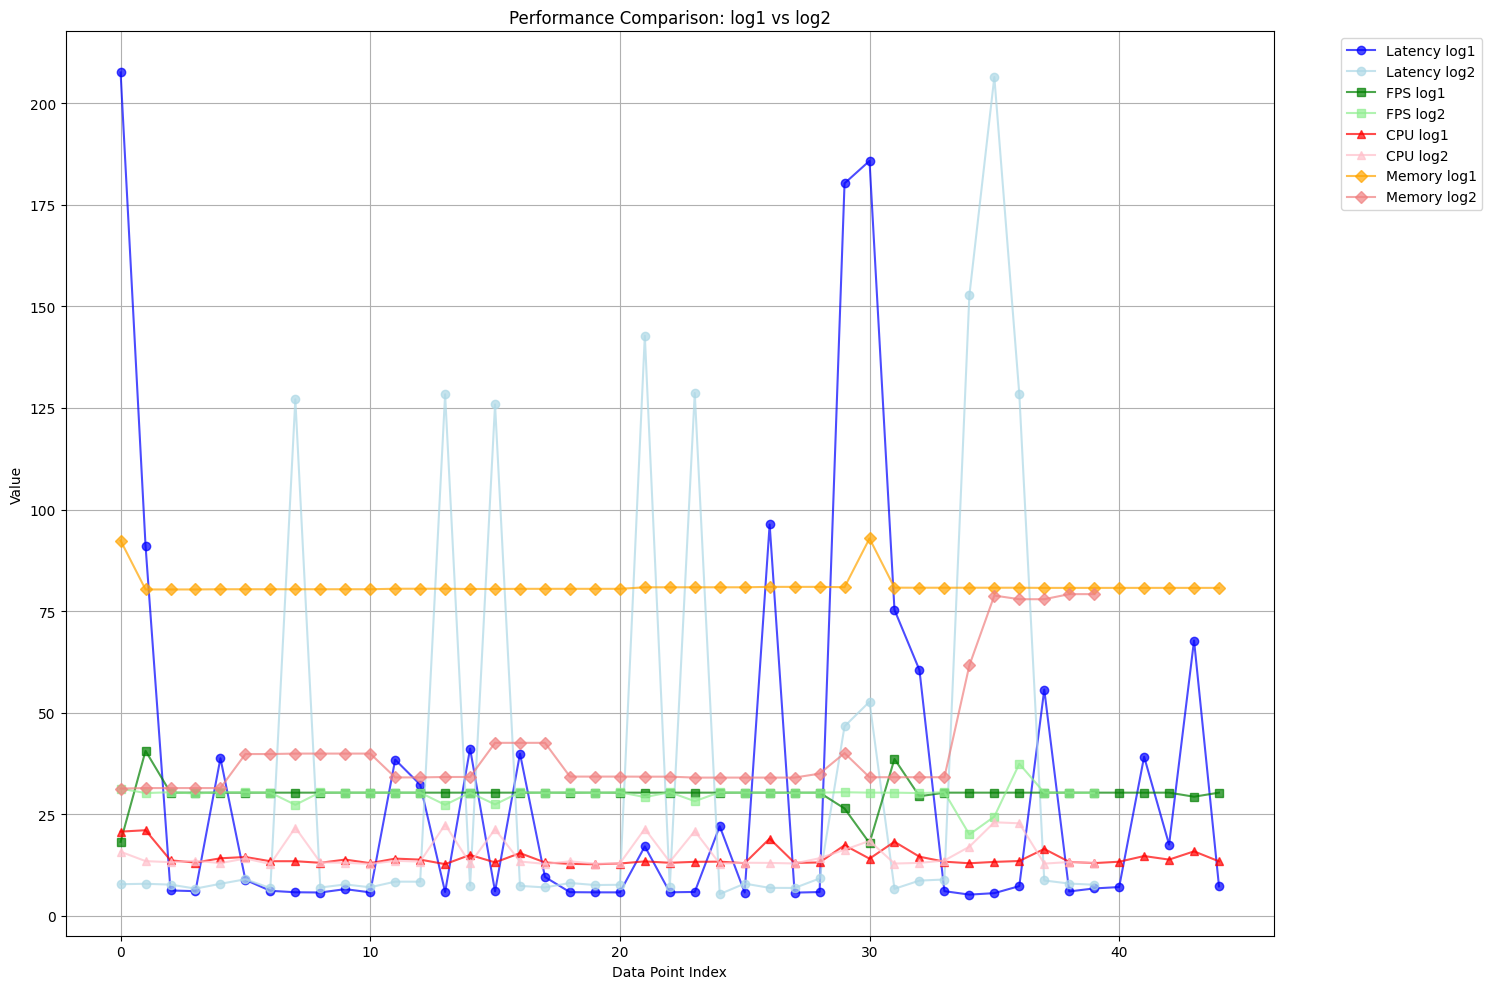

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 正则表达式（更新以包含CPU、内存和线程数信息）
pattern = re.compile(
    r"\[INFO\] \[(\d+\.\d+)\] .*Latency avg: (\d+(?:\.\d+)?) ms \| FPS: (\d+(?:\.\d+)?) \| Throughput: (\d+(?:\.\d+)?) MB/s \| Size: (\d+(?:\.\d+)?) MB \| CPU: (\d+(?:\.\d+)?)% \| Mem: (\d+(?:\.\d+)?) MB \| Threads: (\d+)"
)

def parse_log(filename):
    timestamps, latency, fps, throughput, size, cpu, mem, threads = [], [], [], [], [], [], [], []
    with open(filename, "r") as f:
        for line in f:
            match = pattern.search(line)
            if match:
                timestamps.append(float(match.group(1)))
                latency.append(float(match.group(2)))
                fps.append(float(match.group(3)))
                throughput.append(float(match.group(4)))
                size.append(float(match.group(5)))
                cpu.append(float(match.group(6)))
                mem.append(float(match.group(7)))
                threads.append(int(match.group(8)))
    return pd.DataFrame({
        "Timestamp": timestamps,
        "Latency(ms)": latency,
        "FPS": fps,
        "Throughput(MB/s)": throughput,
        "Size(MB)": size,
        "CPU(%)": cpu,
        "Mem(MB)": mem,
        "Threads": threads
    })

# 解析两个日志文件
df1 = parse_log("log1.txt")
df2 = parse_log("log2.txt")

# 创建共同的x轴（基于数据索引）
x1 = range(len(df1))
x2 = range(len(df2))

# 绘制多个子图
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Latency 对比
axs[0, 0].plot(x1, df1["Latency(ms)"], label="Latency log1", marker="o", alpha=0.7)
axs[0, 0].plot(x2, df2["Latency(ms)"], label="Latency log2", marker="o", alpha=0.7)
axs[0, 0].set_xlabel("Data Point Index")
axs[0, 0].set_ylabel("Latency (ms)")
axs[0, 0].set_title("Latency Comparison")
axs[0, 0].legend()
axs[0, 0].grid(True)

# FPS 对比
axs[0, 1].plot(x1, df1["FPS"], label="FPS log1", marker="s", alpha=0.7)
axs[0, 1].plot(x2, df2["FPS"], label="FPS log2", marker="s", alpha=0.7)
axs[0, 1].set_xlabel("Data Point Index")
axs[0, 1].set_ylabel("FPS")
axs[0, 1].set_title("FPS Comparison")
axs[0, 1].legend()
axs[0, 1].grid(True)

# CPU 对比
axs[1, 0].plot(x1, df1["CPU(%)"], label="CPU log1", marker="^", alpha=0.7)
axs[1, 0].plot(x2, df2["CPU(%)"], label="CPU log2", marker="^", alpha=0.7)
axs[1, 0].set_xlabel("Data Point Index")
axs[1, 0].set_ylabel("CPU Usage (%)")
axs[1, 0].set_title("CPU Comparison")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Memory 对比
axs[1, 1].plot(x1, df1["Mem(MB)"], label="Memory log1", marker="D", alpha=0.7)
axs[1, 1].plot(x2, df2["Mem(MB)"], label="Memory log2", marker="D", alpha=0.7)
axs[1, 1].set_xlabel("Data Point Index")
axs[1, 1].set_ylabel("Memory Usage (MB)")
axs[1, 1].set_title("Memory Comparison")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.savefig("comparison_subplots.png")
plt.show()

# 或者继续使用单一图表显示所有指标（可以选择显示哪些指标）
plt.figure(figsize=(15, 10))

# Latency 对比
plt.plot(x1, df1["Latency(ms)"], label="Latency log1", marker="o", alpha=0.7, color='blue')
plt.plot(x2, df2["Latency(ms)"], label="Latency log2", marker="o", alpha=0.7, color='lightblue')

# FPS 对比
plt.plot(x1, df1["FPS"], label="FPS log1", marker="s", alpha=0.7, color='green')
plt.plot(x2, df2["FPS"], label="FPS log2", marker="s", alpha=0.7, color='lightgreen')

# CPU 对比
plt.plot(x1, df1["CPU(%)"], label="CPU log1", marker="^", alpha=0.7, color='red')
plt.plot(x2, df2["CPU(%)"], label="CPU log2", marker="^", alpha=0.7, color='pink')

# Memory 对比
plt.plot(x1, df1["Mem(MB)"], label="Memory log1", marker="D", alpha=0.7, color='orange')
plt.plot(x2, df2["Mem(MB)"], label="Memory log2", marker="D", alpha=0.7, color='lightcoral')

plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Performance Comparison: log1 vs log2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("comparison_all.png")
plt.show()

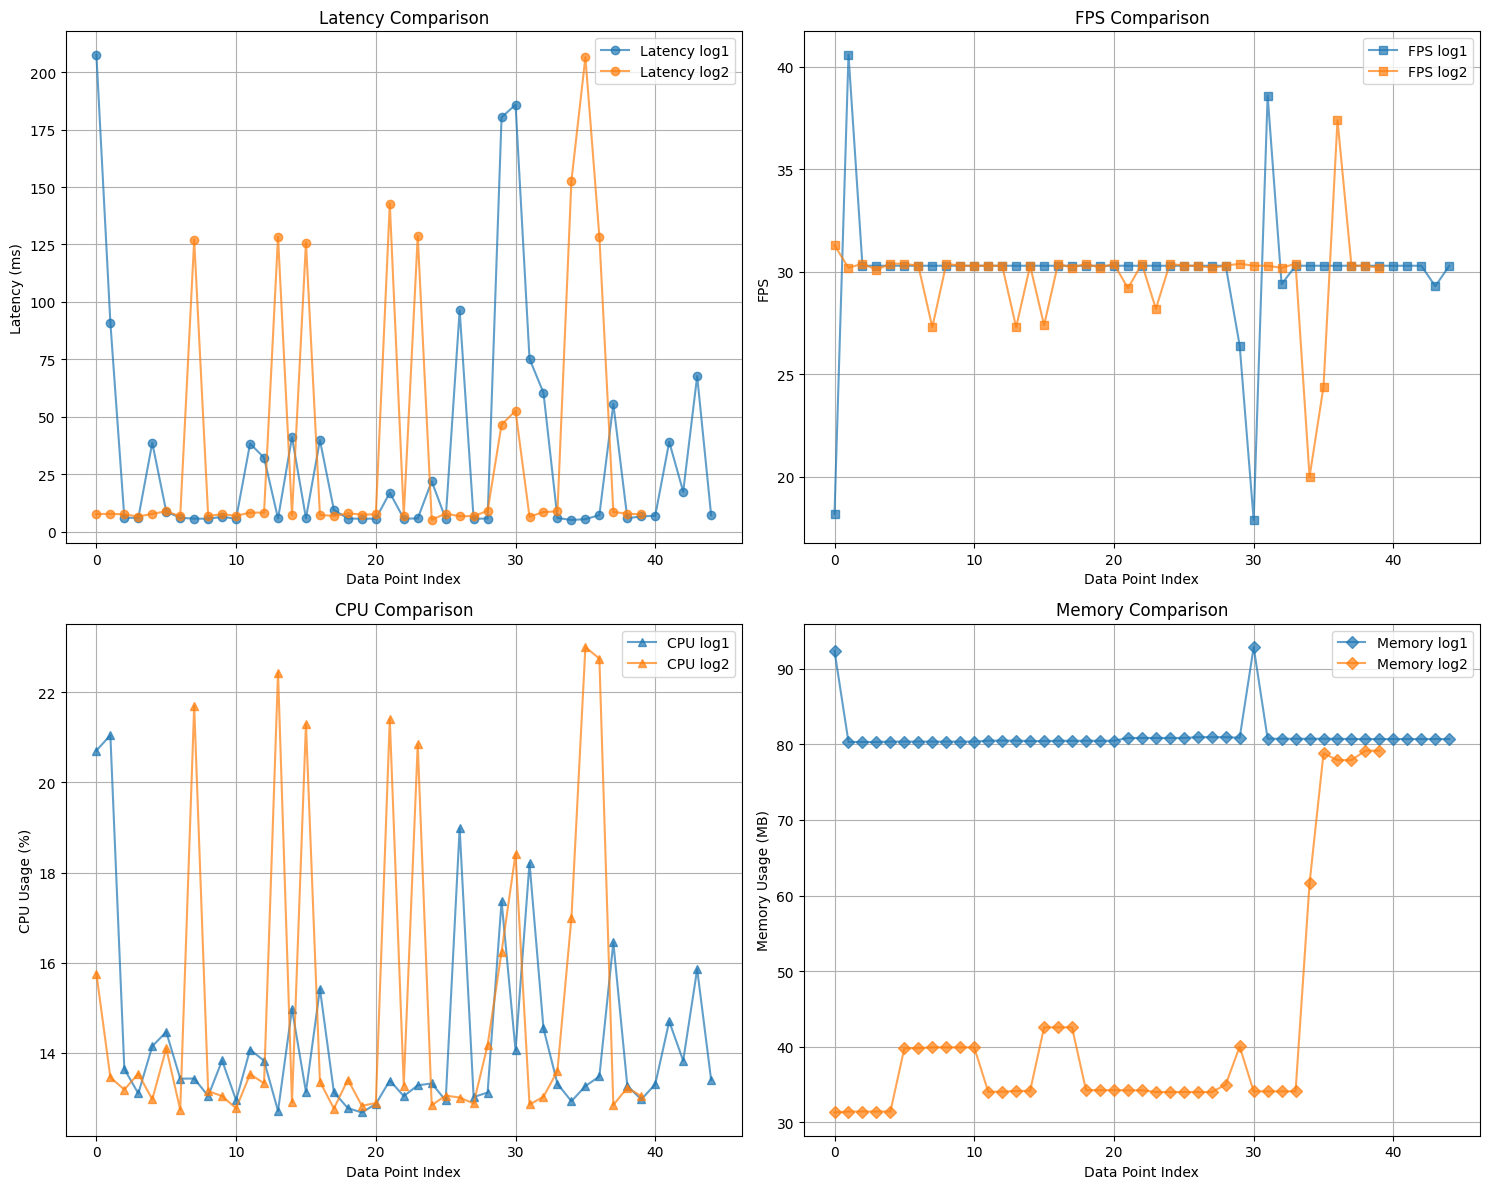

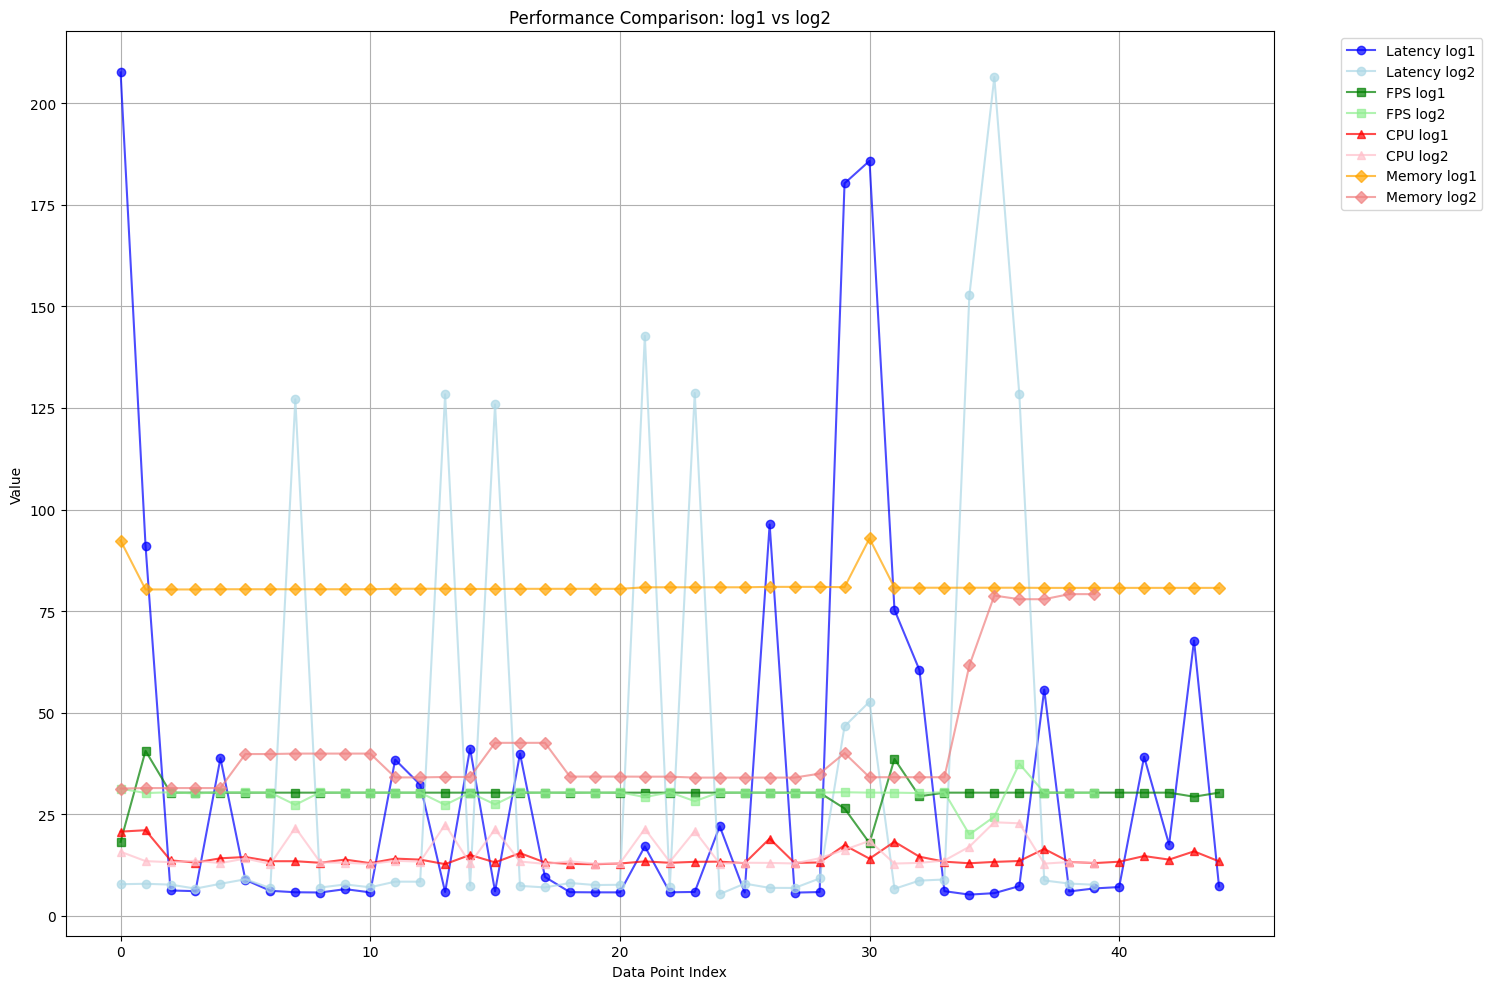

In [8]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 正则表达式（更新以包含CPU、内存和线程数信息）
pattern = re.compile(
    r"\[INFO\] \[(\d+\.\d+)\] .*Latency avg: (\d+(?:\.\d+)?) ms \| FPS: (\d+(?:\.\d+)?) \| Throughput: (\d+(?:\.\d+)?) MB/s \| Size: (\d+(?:\.\d+)?) MB \| CPU: (\d+(?:\.\d+)?)% \| Mem: (\d+(?:\.\d+)?) MB \| Threads: (\d+)"
)

def parse_log(filename):
    timestamps, latency, fps, throughput, size, cpu, mem, threads = [], [], [], [], [], [], [], []
    with open(filename, "r") as f:
        for line in f:
            match = pattern.search(line)
            if match:
                timestamps.append(float(match.group(1)))
                latency.append(float(match.group(2)))
                fps.append(float(match.group(3)))
                throughput.append(float(match.group(4)))
                size.append(float(match.group(5)))
                cpu.append(float(match.group(6)))
                mem.append(float(match.group(7)))
                threads.append(int(match.group(8)))
    return pd.DataFrame({
        "Timestamp": timestamps,
        "Latency(ms)": latency,
        "FPS": fps,
        "Throughput(MB/s)": throughput,
        "Size(MB)": size,
        "CPU(%)": cpu,
        "Mem(MB)": mem,
        "Threads": threads
    })

# 解析两个日志文件
df1 = parse_log("log1.txt")
df2 = parse_log("log2.txt")

# 创建共同的x轴（基于数据索引）
x1 = range(len(df1))
x2 = range(len(df2))

# 绘制多个子图
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Latency 对比
axs[0, 0].plot(x1, df1["Latency(ms)"], label="Latency log1", marker="o", alpha=0.7)
axs[0, 0].plot(x2, df2["Latency(ms)"], label="Latency log2", marker="o", alpha=0.7)
axs[0, 0].set_xlabel("Data Point Index")
axs[0, 0].set_ylabel("Latency (ms)")
axs[0, 0].set_title("Latency Comparison")
axs[0, 0].legend()
axs[0, 0].grid(True)

# FPS 对比
axs[0, 1].plot(x1, df1["FPS"], label="FPS log1", marker="s", alpha=0.7)
axs[0, 1].plot(x2, df2["FPS"], label="FPS log2", marker="s", alpha=0.7)
axs[0, 1].set_xlabel("Data Point Index")
axs[0, 1].set_ylabel("FPS")
axs[0, 1].set_title("FPS Comparison")
axs[0, 1].legend()
axs[0, 1].grid(True)

# CPU 对比
axs[1, 0].plot(x1, df1["CPU(%)"], label="CPU log1", marker="^", alpha=0.7)
axs[1, 0].plot(x2, df2["CPU(%)"], label="CPU log2", marker="^", alpha=0.7)
axs[1, 0].set_xlabel("Data Point Index")
axs[1, 0].set_ylabel("CPU Usage (%)")
axs[1, 0].set_title("CPU Comparison")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Memory 对比
axs[1, 1].plot(x1, df1["Mem(MB)"], label="Memory log1", marker="D", alpha=0.7)
axs[1, 1].plot(x2, df2["Mem(MB)"], label="Memory log2", marker="D", alpha=0.7)
axs[1, 1].set_xlabel("Data Point Index")
axs[1, 1].set_ylabel("Memory Usage (MB)")
axs[1, 1].set_title("Memory Comparison")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.savefig("comparison_subplots.png")
plt.show()

# 或者继续使用单一图表显示所有指标（可以选择显示哪些指标）
plt.figure(figsize=(15, 10))

# Latency 对比
plt.plot(x1, df1["Latency(ms)"], label="Latency log1", marker="o", alpha=0.7, color='blue')
plt.plot(x2, df2["Latency(ms)"], label="Latency log2", marker="o", alpha=0.7, color='lightblue')

# FPS 对比
plt.plot(x1, df1["FPS"], label="FPS log1", marker="s", alpha=0.7, color='green')
plt.plot(x2, df2["FPS"], label="FPS log2", marker="s", alpha=0.7, color='lightgreen')

# CPU 对比
plt.plot(x1, df1["CPU(%)"], label="CPU log1", marker="^", alpha=0.7, color='red')
plt.plot(x2, df2["CPU(%)"], label="CPU log2", marker="^", alpha=0.7, color='pink')

# Memory 对比
plt.plot(x1, df1["Mem(MB)"], label="Memory log1", marker="D", alpha=0.7, color='orange')
plt.plot(x2, df2["Mem(MB)"], label="Memory log2", marker="D", alpha=0.7, color='lightcoral')

plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Performance Comparison: log1 vs log2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("comparison_all.png")
plt.show()

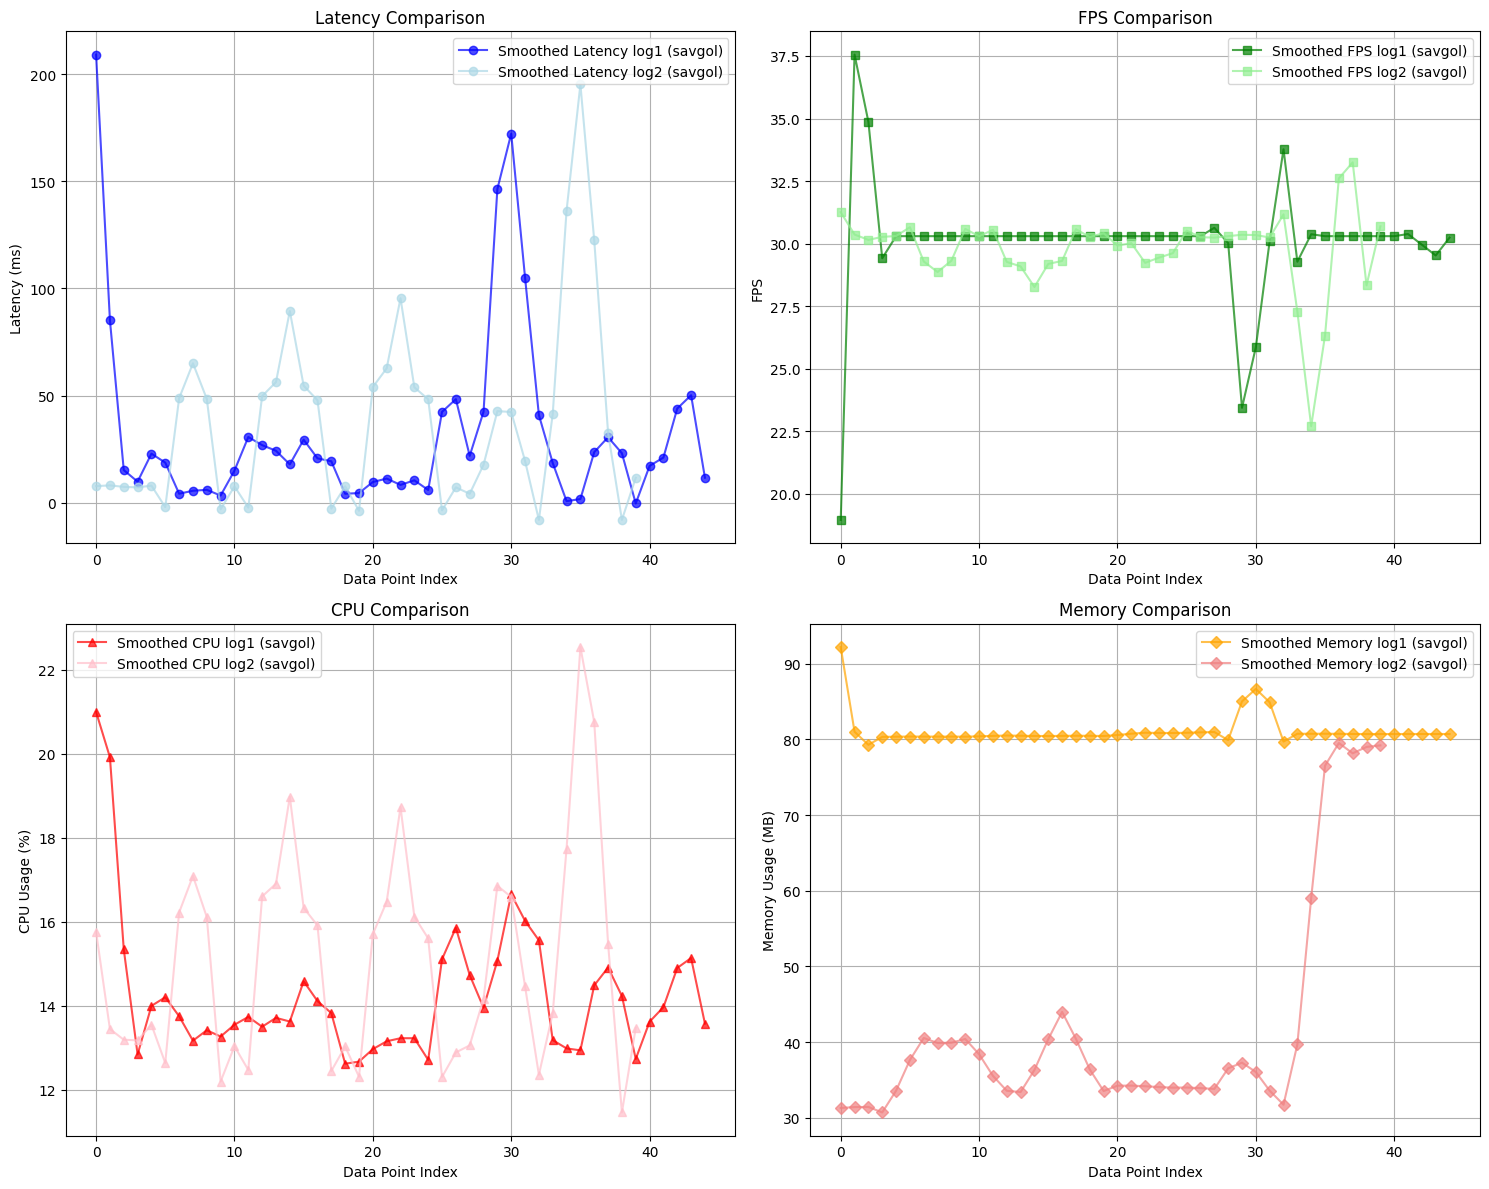

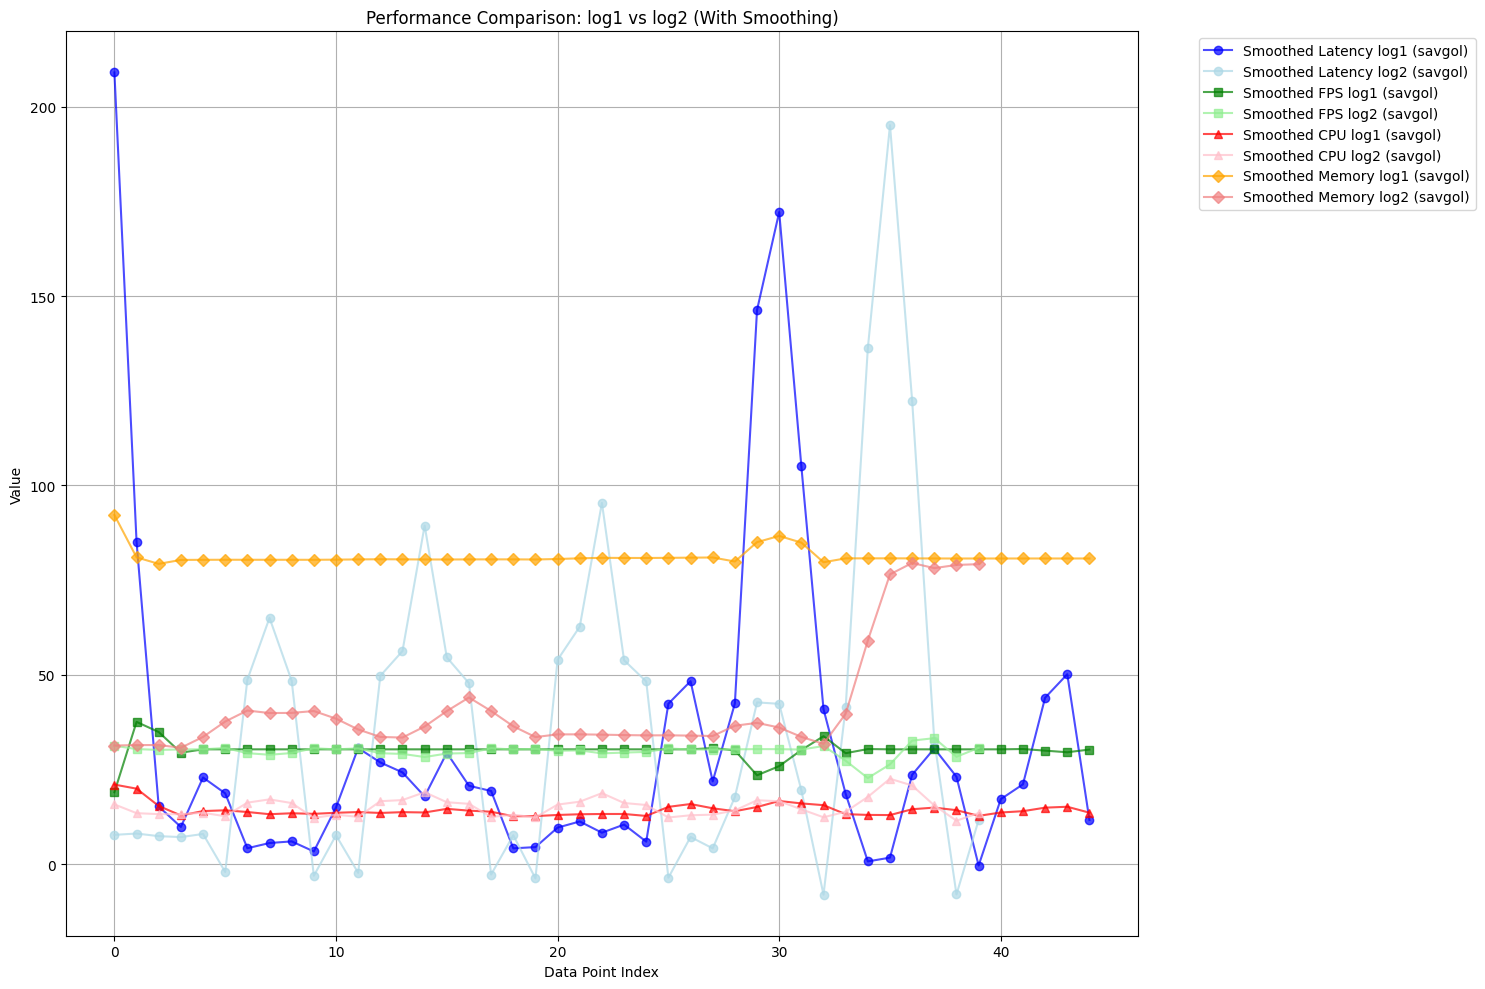

In [6]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# 正则表达式（更新以包含CPU、内存和线程数信息）
pattern = re.compile(
    r"\[INFO\] \[(\d+\.\d+)\] .*Latency avg: (\d+(?:\.\d+)?) ms \| FPS: (\d+(?:\.\d+)?) \| Throughput: (\d+(?:\.\d+)?) MB/s \| Size: (\d+(?:\.\d+)?) MB \| CPU: (\d+(?:\.\d+)?)% \| Mem: (\d+(?:\.\d+)?) MB \| Threads: (\d+)"
)

def parse_log(filename):
    timestamps, latency, fps, throughput, size, cpu, mem, threads = [], [], [], [], [], [], [], []
    with open(filename, "r") as f:
        for line in f:
            match = pattern.search(line)
            if match:
                timestamps.append(float(match.group(1)))
                latency.append(float(match.group(2)))
                fps.append(float(match.group(3)))
                throughput.append(float(match.group(4)))
                size.append(float(match.group(5)))
                cpu.append(float(match.group(6)))
                mem.append(float(match.group(7)))
                threads.append(int(match.group(8)))
    return pd.DataFrame({
        "Timestamp": timestamps,
        "Latency(ms)": latency,
        "FPS": fps,
        "Throughput(MB/s)": throughput,
        "Size(MB)": size,
        "CPU(%)": cpu,
        "Mem(MB)": mem,
        "Threads": threads
    })

# 数据平滑函数
def smooth_data(data, method='moving_average', window_length=5):
    """
    对数据进行平滑处理
    
    参数:
    - data: 要平滑的数据序列
    - method: 平滑方法 ('moving_average' 或 'savgol')
    - window_length: 平滑窗口大小
    
    返回:
    - 平滑后的数据序列
    """
    if method == 'moving_average':
        # 移动平均线平滑
        return data.rolling(window=window_length, center=True).mean()
    elif method == 'savgol':
        # Savitzky-Golay滤波 (需要scipy)
        if len(data) < window_length:
            return data  # 数据点太少，无法应用滤波
        # 确保窗口大小为奇数
        window_length = window_length if window_length % 2 == 1 else window_length + 1
        # 多项式阶数通常比窗口大小小1
        polyorder = min(3, window_length - 1)
        return savgol_filter(data, window_length=window_length, polyorder=polyorder)
    else:
        return data  # 默认返回原始数据

# 解析两个日志文件
df1 = parse_log("log1.txt")
df2 = parse_log("log2.txt")

# 创建共同的x轴（基于数据索引）
x1 = range(len(df1))
x2 = range(len(df2))

# 设置平滑参数
SMOOTH_METHOD = 'savgol'  # 可选: 'moving_average' 或 'savgol'
WINDOW_LENGTH = 5

# 应用数据平滑
smooth_df1 = df1.copy()
smooth_df2 = df2.copy()

for col in ['Latency(ms)', 'FPS', 'CPU(%)', 'Mem(MB)']:
    smooth_df1[col] = smooth_data(df1[col], method=SMOOTH_METHOD, window_length=WINDOW_LENGTH)
    smooth_df2[col] = smooth_data(df2[col], method=SMOOTH_METHOD, window_length=WINDOW_LENGTH)

# 绘制多个子图（包含原始数据和平滑数据）
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Latency 对比
# axs[0, 0].plot(x1, df1["Latency(ms)"], label="Raw Latency log1", alpha=0.3, color='blue')
# axs[0, 0].plot(x2, df2["Latency(ms)"], label="Raw Latency log2", alpha=0.3, color='lightblue')
axs[0, 0].plot(x1, smooth_df1["Latency(ms)"], label=f"Smoothed Latency log1 ({SMOOTH_METHOD})", marker="o", alpha=0.7, color='blue')
axs[0, 0].plot(x2, smooth_df2["Latency(ms)"], label=f"Smoothed Latency log2 ({SMOOTH_METHOD})", marker="o", alpha=0.7, color='lightblue')
axs[0, 0].set_xlabel("Data Point Index")
axs[0, 0].set_ylabel("Latency (ms)")
axs[0, 0].set_title("Latency Comparison")
axs[0, 0].legend()
axs[0, 0].grid(True)

# FPS 对比
# axs[0, 1].plot(x1, df1["FPS"], label="Raw FPS log1", alpha=0.3, color='green')
# axs[0, 1].plot(x2, df2["FPS"], label="Raw FPS log2", alpha=0.3, color='lightgreen')
axs[0, 1].plot(x1, smooth_df1["FPS"], label=f"Smoothed FPS log1 ({SMOOTH_METHOD})", marker="s", alpha=0.7, color='green')
axs[0, 1].plot(x2, smooth_df2["FPS"], label=f"Smoothed FPS log2 ({SMOOTH_METHOD})", marker="s", alpha=0.7, color='lightgreen')
axs[0, 1].set_xlabel("Data Point Index")
axs[0, 1].set_ylabel("FPS")
axs[0, 1].set_title("FPS Comparison")
axs[0, 1].legend()
axs[0, 1].grid(True)

# CPU 对比
# axs[1, 0].plot(x1, df1["CPU(%)"], label="Raw CPU log1", alpha=0.3, color='red')
# axs[1, 0].plot(x2, df2["CPU(%)"], label="Raw CPU log2", alpha=0.3, color='pink')
axs[1, 0].plot(x1, smooth_df1["CPU(%)"], label=f"Smoothed CPU log1 ({SMOOTH_METHOD})", marker="^", alpha=0.7, color='red')
axs[1, 0].plot(x2, smooth_df2["CPU(%)"], label=f"Smoothed CPU log2 ({SMOOTH_METHOD})", marker="^", alpha=0.7, color='pink')
axs[1, 0].set_xlabel("Data Point Index")
axs[1, 0].set_ylabel("CPU Usage (%)")
axs[1, 0].set_title("CPU Comparison")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Memory 对比
# axs[1, 1].plot(x1, df1["Mem(MB)"], label="Raw Memory log1", alpha=0.3, color='orange')
# axs[1, 1].plot(x2, df2["Mem(MB)"], label="Raw Memory log2", alpha=0.3, color='lightcoral')
axs[1, 1].plot(x1, smooth_df1["Mem(MB)"], label=f"Smoothed Memory log1 ({SMOOTH_METHOD})", marker="D", alpha=0.7, color='orange')
axs[1, 1].plot(x2, smooth_df2["Mem(MB)"], label=f"Smoothed Memory log2 ({SMOOTH_METHOD})", marker="D", alpha=0.7, color='lightcoral')
axs[1, 1].set_xlabel("Data Point Index")
axs[1, 1].set_ylabel("Memory Usage (MB)")
axs[1, 1].set_title("Memory Comparison")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.savefig("comparison_subplots_smoothed.png")
plt.show()

# 或者继续使用单一图表显示所有指标（可以选择显示哪些指标）
plt.figure(figsize=(15, 10))

# Latency 对比
# plt.plot(x1, df1["Latency(ms)"], label="Raw Latency log1", alpha=0.3, color='blue')
# plt.plot(x2, df2["Latency(ms)"], label="Raw Latency log2", alpha=0.3, color='lightblue')
plt.plot(x1, smooth_df1["Latency(ms)"], label=f"Smoothed Latency log1 ({SMOOTH_METHOD})", marker="o", alpha=0.7, color='blue')
plt.plot(x2, smooth_df2["Latency(ms)"], label=f"Smoothed Latency log2 ({SMOOTH_METHOD})", marker="o", alpha=0.7, color='lightblue')

# FPS 对比
# plt.plot(x1, df1["FPS"], label="Raw FPS log1", alpha=0.3, color='green')
# plt.plot(x2, df2["FPS"], label="Raw FPS log2", alpha=0.3, color='lightgreen')
plt.plot(x1, smooth_df1["FPS"], label=f"Smoothed FPS log1 ({SMOOTH_METHOD})", marker="s", alpha=0.7, color='green')
plt.plot(x2, smooth_df2["FPS"], label=f"Smoothed FPS log2 ({SMOOTH_METHOD})", marker="s", alpha=0.7, color='lightgreen')

# CPU 对比
# plt.plot(x1, df1["CPU(%)"], label="Raw CPU log1", alpha=0.3, color='red')
# plt.plot(x2, df2["CPU(%)"], label="Raw CPU log2", alpha=0.3, color='pink')
plt.plot(x1, smooth_df1["CPU(%)"], label=f"Smoothed CPU log1 ({SMOOTH_METHOD})", marker="^", alpha=0.7, color='red')
plt.plot(x2, smooth_df2["CPU(%)"], label=f"Smoothed CPU log2 ({SMOOTH_METHOD})", marker="^", alpha=0.7, color='pink')

# Memory 对比
# plt.plot(x1, df1["Mem(MB)"], label="Raw Memory log1", alpha=0.3, color='orange')
# plt.plot(x2, df2["Mem(MB)"], label="Raw Memory log2", alpha=0.3, color='lightcoral')
plt.plot(x1, smooth_df1["Mem(MB)"], label=f"Smoothed Memory log1 ({SMOOTH_METHOD})", marker="D", alpha=0.7, color='orange')
plt.plot(x2, smooth_df2["Mem(MB)"], label=f"Smoothed Memory log2 ({SMOOTH_METHOD})", marker="D", alpha=0.7, color='lightcoral')

plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Performance Comparison: log1 vs log2 (With Smoothing)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("comparison_all_smoothed.png")
plt.show()